In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
import keras_tuner as kt

In [2]:
df=pd.read_csv('28_datos_modelos.csv')

In [3]:
df.columns

Index(['Fecha_Hora', 'pm25', 'no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr',
       'p_ssr', 'rglobal_ssr', 'taire10_ssr', 'vviento_ssr', 'pm25_lag1',
       'pm25_lag2', 'pm25_lag3', 'pm25_lag4', 'pm25_lag5', 'pm25_lag6',
       'pm25_lag12', 'pm25_lag24', 'no_lag1', 'no_lag2', 'no_lag3', 'no_lag4',
       'no_lag5', 'no_lag6', 'no_lag12', 'no_lag24', 'no2_lag1', 'no2_lag2',
       'no2_lag3', 'no2_lag4', 'no2_lag5', 'no2_lag6', 'no2_lag12',
       'no2_lag24', 'nox_lag1', 'nox_lag2', 'nox_lag3', 'nox_lag4', 'nox_lag5',
       'nox_lag6', 'nox_lag12', 'nox_lag24', 'dviento_ssr_lag1',
       'dviento_ssr_lag2', 'dviento_ssr_lag3', 'dviento_ssr_lag4',
       'dviento_ssr_lag5', 'dviento_ssr_lag6', 'dviento_ssr_lag12',
       'dviento_ssr_lag24', 'haire10_ssr_lag1', 'haire10_ssr_lag2',
       'haire10_ssr_lag3', 'haire10_ssr_lag4', 'haire10_ssr_lag5',
       'haire10_ssr_lag6', 'haire10_ssr_lag12', 'haire10_ssr_lag24',
       'p_ssr_lag1', 'p_ssr_lag2', 'p_ssr_lag3', 'p_ssr_lag4', 'p_s

In [4]:
features = [
    'pm25',
    'no',
    'no2',
    'nox',
    'dviento_ssr',
    'haire10_ssr',
    'p_ssr',
    'rglobal_ssr',
    'taire10_ssr',
    'vviento_ssr'
    ]

In [5]:
df[features].describe()

,pm25,no,no2,nox,dviento_ssr,haire10_ssr,p_ssr,rglobal_ssr,taire10_ssr,vviento_ssr
count,61363.000000,61363.000000,61363.000000,61363.000000,61363.000000,61363.000000,61363.000000,61363.000000,61363.000000,61363.000000
mean,22.628770,16.634809,16.980693,34.050069,212.998267,63.356914,635.494793,185.615115,22.026400,0.819419
std,12.266539,27.906807,19.903342,84.152066,125.752765,15.684685,1.280190,137.907894,3.421955,0.646669
min,0.500000,0.000694,0.000900,0.007500,0.000000,10.400000,630.157000,0.002778,14.600000,0.000443
25%,14.000000,3.799590,9.863965,16.713150,111.900000,51.700000,634.700000,104.727500,19.300000,0.300000
50%,20.372905,9.713706,15.364100,26.612100,227.100000,66.900000,635.600000,169.427028,21.400000,0.700000
75%,29.000000,22.461850,21.571725,41.255300,329.070000,76.290950,636.400000,246.562000,24.400000,1.100000
max,82.606241,659.677512,542.678972,2386.359689,2386.359689,88.349900,639.400000,822.719000,33.400000,4.493070


In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61344 entries, 19 to 61362
Data columns (total 91 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fecha_Hora         61344 non-null  object 
 1   pm25               61344 non-null  float64
 2   no                 61344 non-null  float64
 3   no2                61344 non-null  float64
 4   nox                61344 non-null  float64
 5   dviento_ssr        61344 non-null  float64
 6   haire10_ssr        61344 non-null  float64
 7   p_ssr              61344 non-null  float64
 8   rglobal_ssr        61344 non-null  float64
 9   taire10_ssr        61344 non-null  float64
 10  vviento_ssr        61344 non-null  float64
 11  pm25_lag1          61344 non-null  float64
 12  pm25_lag2          61344 non-null  float64
 13  pm25_lag3          61344 non-null  float64
 14  pm25_lag4          61344 non-null  float64
 15  pm25_lag5          61344 non-null  float64
 16  pm25_lag6          61344 n

In [8]:
df.drop(['Fecha_Hora'], axis=1, inplace=True)

In [9]:
df['pm25'].describe()

count    61344.000000
mean        22.628351
std         12.267401
min          0.500000
25%         14.000000
50%         20.000000
75%         29.000000
max         82.606241
Name: pm25, dtype: float64

# Variables numéricas

<Axes: >

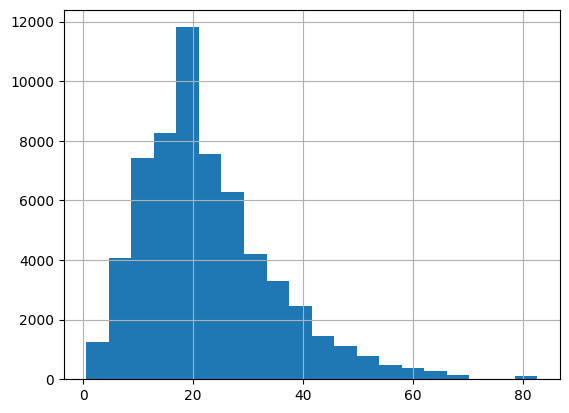

In [10]:
df['pm25'].hist(bins=20)

In [11]:
df['no'].describe()

count    61344.000000
mean        16.638587
std         27.910143
min          0.000694
25%          3.801325
50%          9.713706
75%         22.467725
max        659.677512
Name: no, dtype: float64

<Axes: >

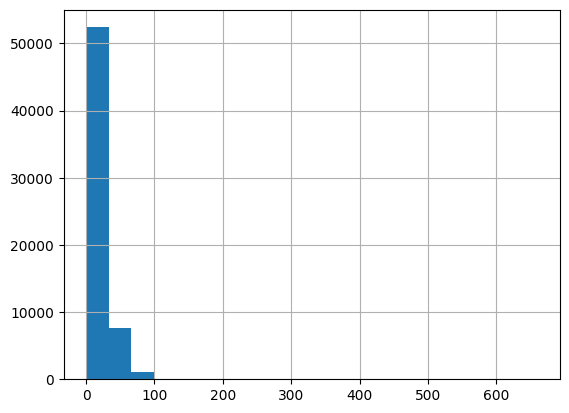

In [12]:
df['no'].hist(bins=20)

'pm25', 'no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr', 'p_ssr',
       'rglobal_ssr', 'taire10_ssr', 'vviento_ssr'

<Axes: >

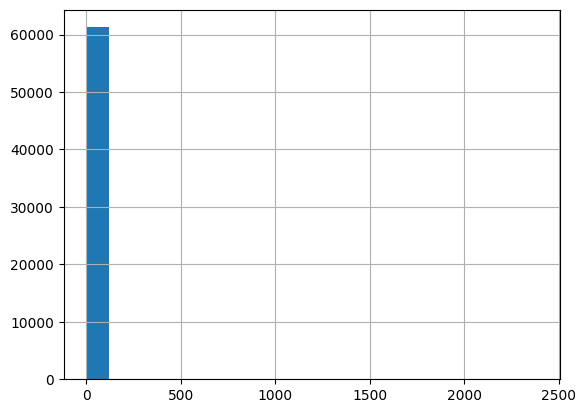

In [13]:
df['nox'].hist(bins=20)

In [14]:
#df['pm25_log']=np.log(df['pm25'])

In [15]:
#df['pm25_log'].hist(bins=20)

In [16]:
df['pm25'].describe()

count    61344.000000
mean        22.628351
std         12.267401
min          0.500000
25%         14.000000
50%         20.000000
75%         29.000000
max         82.606241
Name: pm25, dtype: float64

<Axes: xlabel='no2', ylabel='pm25'>

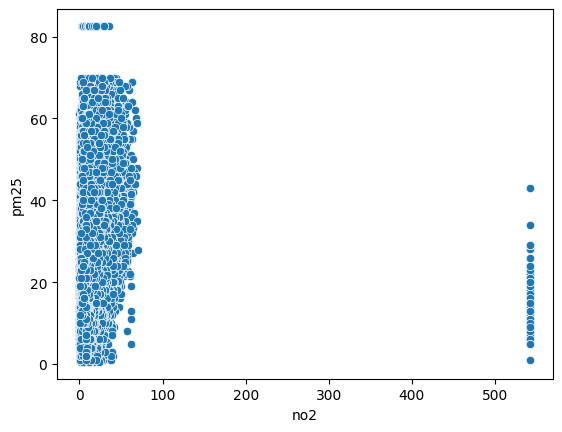

In [17]:
sns.scatterplot(data=df, y='pm25', x='no2')

# Particion de los datos

In [18]:
y=df['pm25']
X=df.drop('pm25', axis=1)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), X_train.columns)])

In [21]:
pipeline=Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor())])

In [22]:
param_grid = {
    # 'n_estimators': np.arange(10,210,10),
    'regressor__n_estimators': [30],
    'regressor__max_depth': [3],
    # 'criterion': ['squared_error', 'absolute_error', 'friedman_mse']
    'regressor__criterion': ['squared_error']
}

In [23]:
# Verificar valores NaN
print("Valores NaN en X_train:\n", X_train.isna().sum())

# Verificar valores infinitos
print("¿Hay valores infinitos en X_train?", np.isinf(X_train).sum().sum())

Valores NaN en X_train:
 no                   0
no2                  0
nox                  0
dviento_ssr          0
haire10_ssr          0
                    ..
vviento_ssr_lag4     0
vviento_ssr_lag5     0
vviento_ssr_lag6     0
vviento_ssr_lag12    0
vviento_ssr_lag24    0
Length: 89, dtype: int64
¿Hay valores infinitos en X_train? 0


In [24]:
#Realizamos la busqueda de los hiperparametros
RF_gridSearch = GridSearchCV(
    pipeline, 
    param_grid=param_grid,
    cv=10,
    scoring='neg_mean_squared_error',  
    n_jobs=-1,
    verbose=2)
RF_gridSearch.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         Index(['no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr', 'p_ssr',
       'rglobal_ssr', 'taire10_ssr', 'vviento_ssr', 'pm25_lag1', 'pm25_lag2',
       'pm25_lag3', 'pm25_lag4', 'pm25_lag5', 'pm25_lag6', 'pm25_lag12',
       'pm25_lag24', 'no_lag1', 'no_lag2', 'no_lag3', 'no_l...
       'vviento_ssr_lag2', 'vviento_ssr_lag3', 'vviento_ssr_lag4',
       'vviento_ssr_lag5', 'vviento_ssr_lag6', 'vviento_ssr_lag12',
       'vviento_ssr_lag24'],
      dtype='object'))])),
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__criterion': ['squared_error'],
                         'regressor__max_depth': [3],
                         'regressor__n_estimators': [30]},
             scoring='neg_mean_squared_error', verbose=2)

In [25]:
best_estimator = RF_gridSearch.best_estimator_

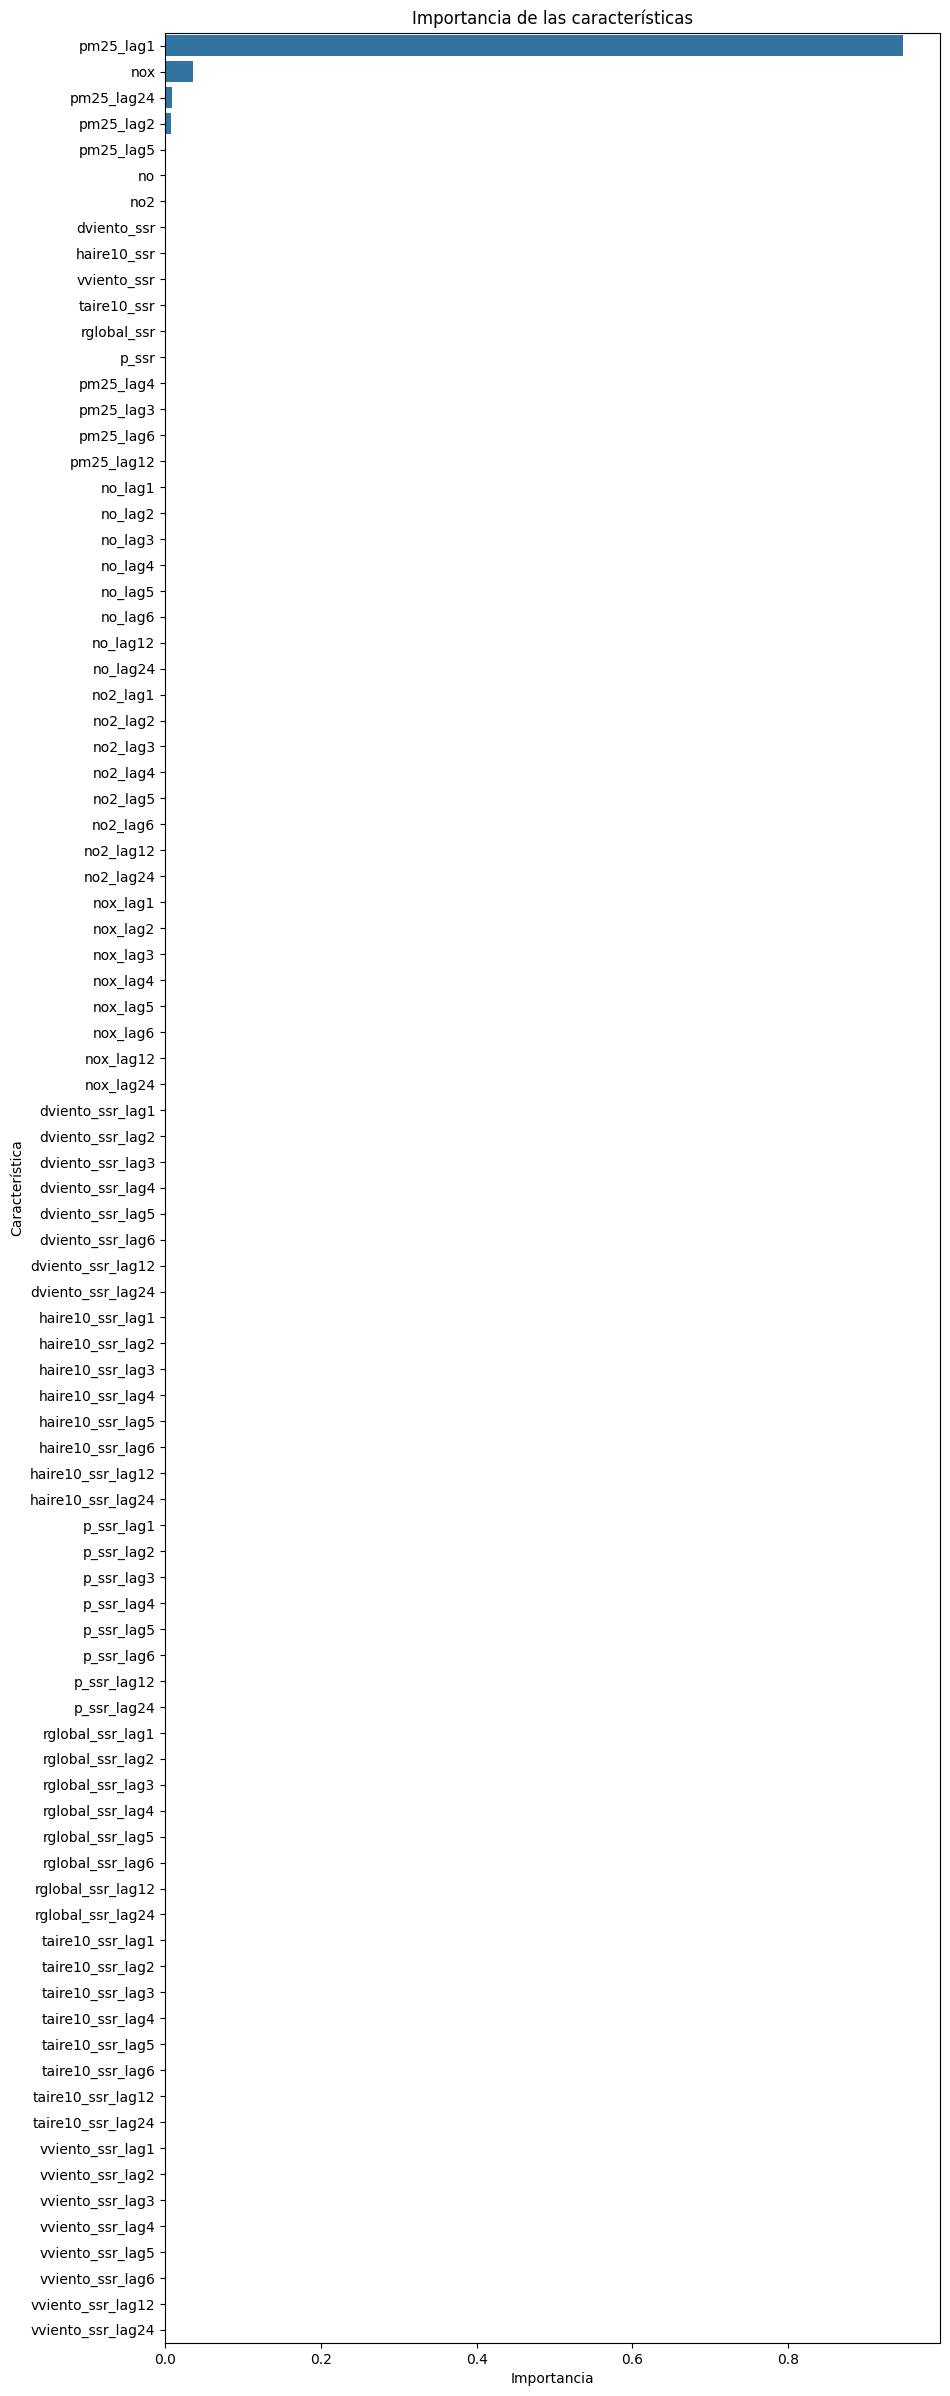

In [26]:
# Feature importance
importances = best_estimator.named_steps['regressor'].feature_importances_
# DataFrame con importancias
importances_df = pd.DataFrame(importances, index=X_train.columns, columns=['Importancia'])
# Ordenar importancias
importances_df = importances_df.sort_values(by='Importancia', ascending=False)
# Gráfico de barras
plt.figure(figsize=(10, 30))
sns.barplot(x='Importancia', y=importances_df.index, data=importances_df)
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características')
plt.show()

In [27]:
y_pred = best_estimator.predict(X_test)

In [28]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 64.77010274852583
R2: 0.5666530591036751


((array([-3.91503061, -3.69554786, -3.57530328, ...,  3.57530328,
          3.69554786,  3.91503061]),
  array([-44.05705034, -41.13213695, -38.51667326, ...,  71.27520429,
          71.69723332,  71.69723332])),
 (np.float64(7.861786665639228),
  np.float64(-0.18077994364975405),
  np.float64(0.9768727581782317)))

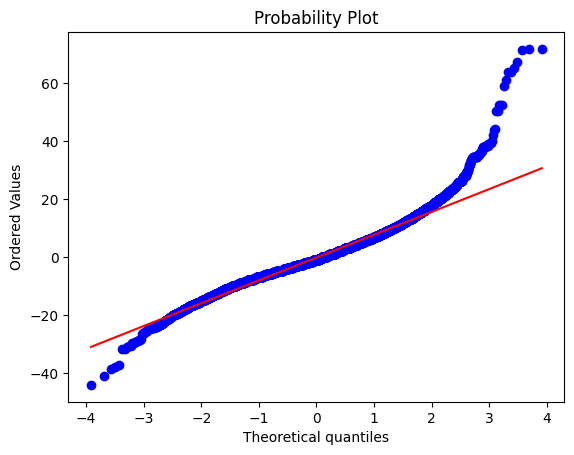

In [29]:
# Do the errors follow a normal distribution?
errors = y_test - y_pred
# Plot the QQ plot
stats.probplot(errors, dist="norm", plot=plt)

In [30]:
# Apply manually the preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
X_val_preprocessed = preprocessor.transform(X_val)

In [31]:
X_train_preprocessed.shape

(23004, 89)

In [32]:
X_train.shape

(23004, 89)

In [33]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_preprocessed.shape[1],)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    return model

In [34]:
def model_builder(hp):
    # Se crea un modelo secuencial
    model = tf.keras.models.Sequential()
    # Se agrega una capa de entrada
    model.add(tf.keras.layers.InputLayer(input_shape=X_train_preprocessed.shape[1:]))
    # Se optimiza el número de capas ocultas
    n_layers = hp.Int('num_hidden_layers', min_value=2, max_value=6)
    # Optimize regularization parameters
    regularizer_choice = hp.Choice('regularizer', values=['none', 'l1', 'l2', 'l1_l2'])
    dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)
    
    # Get regularizer based on choice
    if regularizer_choice == 'l1':
        regularizer = tf.keras.regularizers.L1(hp.Float('l1_value', min_value=1e-4, max_value=1e-2))
    elif regularizer_choice == 'l2':
        regularizer = tf.keras.regularizers.L2(hp.Float('l2_value', min_value=1e-4, max_value=1e-2))
    elif regularizer_choice == 'l1_l2':
        regularizer = tf.keras.regularizers.L1L2(
            l1=hp.Float('l1_l1l2_value', min_value=1e-4, max_value=1e-2),
            l2=hp.Float('l2_l1l2_value', min_value=1e-4, max_value=1e-2)
        )
    else:
        regularizer = None
    # Se optimiza el número de neuronas por capa
    for i in range(n_layers):
        model.add(
            tf.keras.layers.Dense(
                units=hp.Int('units_' + str(i), min_value=10, max_value=100, step=10), 
                activation='relu',
                kernel_regularizer=regularizer
            )
        )
        if dropout_rate > 0.0:
            model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    # Se agrega la capa de salida
    model.add(tf.keras.layers.Dense(1))
    # Se optimiza el learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Se compila el modelo
    model.compile(
        optimizer=tf.keras.optimizers.Adamax(learning_rate=hp_learning_rate),
        loss='mean_squared_error'
    )

    return model

In [35]:
print("X_train_preprocessed dtypes:", X_train_preprocessed.dtype)
print("y_train dtype:", y_train.dtype)
print("X_val dtypes:", X_val_preprocessed.dtype)
print("y_val dtype:", y_val.dtype)

X_train_preprocessed dtypes: float64
y_train dtype: float64
X_val dtypes: float64
y_val dtype: float64


In [36]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [37]:
model_adamax = create_model()
optim_adamax=tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model_adamax.compile(loss='mean_squared_error', optimizer=optim_adamax)
history_adamax = model_adamax.fit(X_train_preprocessed, y_train, epochs=150, validation_data=(X_val_preprocessed, y_val), callbacks=[early_stopping_cb])

Epoch 1/150


d:\UNAL\Tercer Semestre\Propuesta de TDG\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


719/719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 397.3333 - val_loss: 59.8726
Epoch 2/150
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 79.0434 - val_loss: 54.6281
Epoch 3/150
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 73.4618 - val_loss: 52.9710
Epoch 4/150
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 71.8647 - val_loss: 52.5527
Epoch 5/150
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 69.7679 - val_loss: 52.0311
Epoch 6/150
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 67.1908 - val_loss: 51.1052
Epoch 7/150
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 65.8866 - val_loss: 51.8683
Epoch 8/150
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 65.1400 - val_loss: 50.4816
Epoch 9/150
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 64.0431 - val_loss: 50.2632
Epoch 10/150
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 62.5087 - val_loss: 50.3866
Epoch 11/150
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 62.9045 - val_loss: 49.2649
Epoch 12/150
719/719 ━━━━━━━━━

In [38]:
model_adamax.evaluate(X_test_preprocessed, y_test)

480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 48.0844


47.210174560546875

In [39]:
# Calculate the predictions
y_pred_adamax = model_adamax.predict(X_test_preprocessed)
# Calculate the MSE
mse_adamax = mean_squared_error(y_test, y_pred_adamax)
print('MSE:', mse_adamax)
# Calculate the RMSE
rmse_adamax = np.sqrt(mse_adamax)
print('RMSE:', rmse_adamax)
# Calculate the R2
r2_adamax = r2_score(y_test, y_pred_adamax)
print('R2:', r2_adamax)

480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MSE: 47.21019382929171
RMSE: 6.870967459484269
R2: 0.6841383260656977


In [40]:
tuner=kt.RandomSearch(
    model_builder,
    objective='val_loss',
    max_trials=3
)

d:\UNAL\Tercer Semestre\Propuesta de TDG\.venv\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [41]:
tuner.search(X_train_preprocessed, y_train, epochs=100, validation_data=(X_val_preprocessed, y_val), callbacks=[early_stopping_cb])

Trial 3 Complete [00h 01m 17s]
val_loss: 50.385189056396484

Best val_loss So Far: 48.182342529296875
Total elapsed time: 00h 06m 12s


In [42]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# Build the model with the optimal hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
model.fit(X_train_preprocessed, y_train, epochs=100, validation_data=(X_val_preprocessed, y_val), callbacks=[early_stopping_cb])
model.evaluate(X_test_preprocessed, y_test)

Epoch 1/100


d:\UNAL\Tercer Semestre\Propuesta de TDG\.venv\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 131.0248 - val_loss: 61.3209
Epoch 2/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 73.6774 - val_loss: 54.9540
Epoch 3/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 72.5005 - val_loss: 53.9423
Epoch 4/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 70.9791 - val_loss: 61.1698
Epoch 5/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 70.4517 - val_loss: 55.7941
Epoch 6/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 70.1236 - val_loss: 53.4919
Epoch 7/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 68.4697 - val_loss: 65.5465
Epoch 8/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 68.4164 - val_loss: 53.5616
Epoch 9/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 63.3192 - val_loss: 52.1486
Epoch 10/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 65.0152 - val_loss: 51.7241
Epoch 11/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 64.9299 - val_loss: 53.8794
Epoch 12/100
719/719 ━━━━━━━━━

49.327110290527344

In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 90)             │         8,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 90)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 70)             │         6,370 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 70)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            71 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,625 (170.41 KB)

 Trainable params: 14,541 (56.80 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,084 (113.61 KB)

In [44]:
# Calculate the predictions and the MSE, RMSE and R2
y_pred = model.predict(X_test_preprocessed)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
r2 = r2_score(y_test, y_pred)
print('R2:', r2)

480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step
MSE: 49.03437852409714
RMSE: 7.002455178299761
R2: 0.6719335460270892


In [45]:
y_pred.shape

(15336, 1)

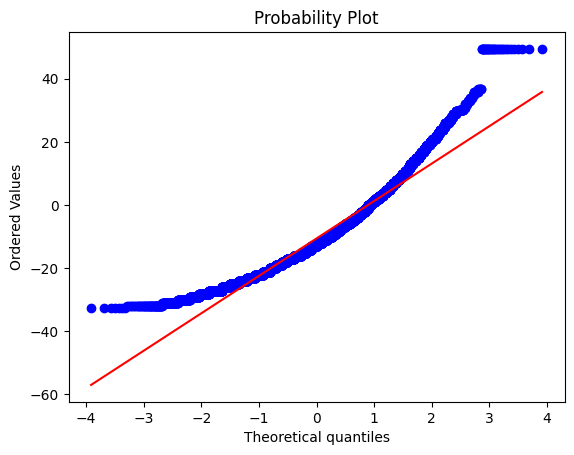

In [46]:
# Plot the QQ plot
errors = y_test - y_pred[0]
stats.probplot(errors, dist="norm", plot=plt)
plt.show()

# 3. Modelo LSTM

In [47]:
def create_multivariate_sequences(data, target_col_idx, seq_length):
    """
    Create sequences from multivariate time series data
    
    Parameters:
    -----------
    data : numpy.ndarray
        Multivariate time series data with shape (n_samples, n_features)
    target_col_idx : int
        Index of the target column (PM2.5) in the data
    seq_length : int
        Length of the sequences to create (lookback window)
        
    Returns:
    --------
    tuple
        (X, y) where X has shape (n_samples, seq_length, n_features)
        and y has shape (n_samples, 1)
    """
    X, y = [], []
    for i in range(len(data) - seq_length):
        # Include all features for X
        X.append(data[i:i + seq_length, :])
        # Only predict the target variable (PM2.5)
        y.append(data[i + seq_length, target_col_idx:target_col_idx+1])
    return np.array(X), np.array(y)

In [48]:
df.columns

Index(['pm25', 'no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr', 'p_ssr',
       'rglobal_ssr', 'taire10_ssr', 'vviento_ssr', 'pm25_lag1', 'pm25_lag2',
       'pm25_lag3', 'pm25_lag4', 'pm25_lag5', 'pm25_lag6', 'pm25_lag12',
       'pm25_lag24', 'no_lag1', 'no_lag2', 'no_lag3', 'no_lag4', 'no_lag5',
       'no_lag6', 'no_lag12', 'no_lag24', 'no2_lag1', 'no2_lag2', 'no2_lag3',
       'no2_lag4', 'no2_lag5', 'no2_lag6', 'no2_lag12', 'no2_lag24',
       'nox_lag1', 'nox_lag2', 'nox_lag3', 'nox_lag4', 'nox_lag5', 'nox_lag6',
       'nox_lag12', 'nox_lag24', 'dviento_ssr_lag1', 'dviento_ssr_lag2',
       'dviento_ssr_lag3', 'dviento_ssr_lag4', 'dviento_ssr_lag5',
       'dviento_ssr_lag6', 'dviento_ssr_lag12', 'dviento_ssr_lag24',
       'haire10_ssr_lag1', 'haire10_ssr_lag2', 'haire10_ssr_lag3',
       'haire10_ssr_lag4', 'haire10_ssr_lag5', 'haire10_ssr_lag6',
       'haire10_ssr_lag12', 'haire10_ssr_lag24', 'p_ssr_lag1', 'p_ssr_lag2',
       'p_ssr_lag3', 'p_ssr_lag4', 'p_ssr_lag5', 'p_s

In [49]:
# Select features to use
features = [
    'pm25',
    'no',
    'no2',
    'nox',
    'dviento_ssr',
    'haire10_ssr',
    'p_ssr',
    'rglobal_ssr',
    'taire10_ssr',
    'vviento_ssr'
    ]  # Adjust based on your available data
data = df[features].values

In [50]:
data[0]

array([1.90000000e+01, 2.56556000e+00, 1.08821000e+01, 1.34436000e+01,
       2.78566000e+02, 7.86471000e+01, 6.37563000e+02, 2.60916318e+02,
       1.78553000e+01, 1.72479000e-01])

In [51]:
# Normalize all features
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create sequences with a window of 24 hours (for looking at previous 24h)
seq_length = 36
pm25_idx = 0  # Index of PM2.5 in your features list
X_lstm, y_lstm = create_multivariate_sequences(data_scaled, pm25_idx, seq_length)

# Split into train, validation, and test sets
X_train_lstm, X_temp_lstm, y_train_lstm, y_temp_lstm = train_test_split(X_lstm, y_lstm, test_size=0.25, random_state=42)
X_val_lstm, X_test_lstm, y_val_lstm, y_test_lstm = train_test_split(X_temp_lstm, y_temp_lstm, test_size=0.5, random_state=42)

# Report data shapes
print(f"X_train shape: {X_train_lstm.shape}")  # Should be (n_samples, seq_length, n_features)
print(f"y_train shape: {y_train_lstm.shape}")  # Should be (n_samples, 1)

X_train shape: (45981, 36, 10)
y_train shape: (45981, 1)


In [52]:
data_scaled.shape

(61344, 10)

In [53]:
data_scaled

array([[0.22531783, 0.00388806, 0.02005093, ..., 0.31713674, 0.17315426,
        0.03829305],
       [0.11570375, 0.00678153, 0.02017845, ..., 0.31713674, 0.14137766,
        0.06221357],
       [0.14006243, 0.00442957, 0.01745672, ..., 0.31713674, 0.13204787,
        0.07347291],
       ...,
       [0.1887798 , 0.00661946, 0.00997737, ..., 0.16181169, 0.30851064,
        0.28926445],
       [0.28621454, 0.00559138, 0.0081892 , ..., 0.16181169, 0.29255319,
        0.177971  ],
       [0.28621454, 0.00528229, 0.0070294 , ..., 0.16181169, 0.28723404,
        0.22248838]])

In [54]:
X_lstm

array([[[0.22531783, 0.00388806, 0.02005093, ..., 0.31713674,
         0.17315426, 0.03829305],
        [0.11570375, 0.00678153, 0.02017845, ..., 0.31713674,
         0.14137766, 0.06221357],
        [0.14006243, 0.00442957, 0.01745672, ..., 0.31713674,
         0.13204787, 0.07347291],
        ...,
        [0.12788309, 0.01730954, 0.02003674, ..., 0.39315892,
         0.36040426, 0.26593067],
        [0.20095915, 0.01885515, 0.03355746, ..., 0.59438626,
         0.46396809, 0.08935137],
        [0.11570375, 0.00754705, 0.02350602, ..., 0.71812273,
         0.55119149, 0.09382692]],

       [[0.11570375, 0.00678153, 0.02017845, ..., 0.31713674,
         0.14137766, 0.06221357],
        [0.14006243, 0.00442957, 0.01745672, ..., 0.31713674,
         0.13204787, 0.07347291],
        [0.09134507, 0.00422893, 0.01396202, ..., 0.31713674,
         0.12636702, 0.11142687],
        ...,
        [0.20095915, 0.01885515, 0.03355746, ..., 0.59438626,
         0.46396809, 0.08935137],
        [0.1

In [55]:
# Define model architecture
def build_multivariate_lstm_model(seq_length, n_features, lstm_units=50, dropout_rate=0.2):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units=lstm_units, return_sequences=True, 
                  input_shape=(seq_length, n_features)))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.LSTM(units=lstm_units))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(units=1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def build_bidirectional_lstm_model(seq_length, n_features):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True), 
                          input_shape=(seq_length, n_features)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)))
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    model.compile(
        optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),
        loss='mean_squared_error')
    return model

# Get the number of features
n_features = X_train_lstm.shape[2]

# Create and compile the model
# lstm_model = build_multivariate_lstm_model(seq_length, n_features)
lstm_model = build_bidirectional_lstm_model(seq_length, n_features)
lstm_model.summary()

# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
lstm_history = lstm_model.fit(
    X_train_lstm, y_train_lstm,
    epochs=60,
    batch_size=32,
    validation_data=(X_val_lstm, y_val_lstm),
    callbacks=[early_stopping],
    verbose=1
)

d:\UNAL\Tercer Semestre\Propuesta de TDG\.venv\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 36, 64)         │        11,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 36, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 36, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 32)             │        10,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,177 (86.63 KB)

 Trainable params: 22,049 (86.13 KB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/60
1437/1437 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - loss: 0.0167 - val_loss: 0.0100
Epoch 2/60
1437/1437 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - loss: 0.0099 - val_loss: 0.0094
Epoch 3/60
1437/1437 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - loss: 0.0094 - val_loss: 0.0092
Epoch 4/60
1437/1437 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 5/60
1437/1437 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 6/60
1437/1437 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - loss: 0.0086 - val_loss: 0.0089
Epoch 7/60
1437/1437 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - loss: 0.0086 - val_loss: 0.0090
Epoch 8/60
1437/1437 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - loss: 0.0086 - val_loss: 0.0091
Epoch 9/60
1437/1437 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - loss: 0.0087 - val_loss: 0.0089
Epoch 10/60
1437/1437 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - loss: 0.0085 - val_loss: 0.0089
Epoch 11/60
1437/1437 ━━━━━━━━━━━━━━━━━━━━ 28s 20ms/step - loss: 0.0084 - val_loss: 0.0088
Epoch 12

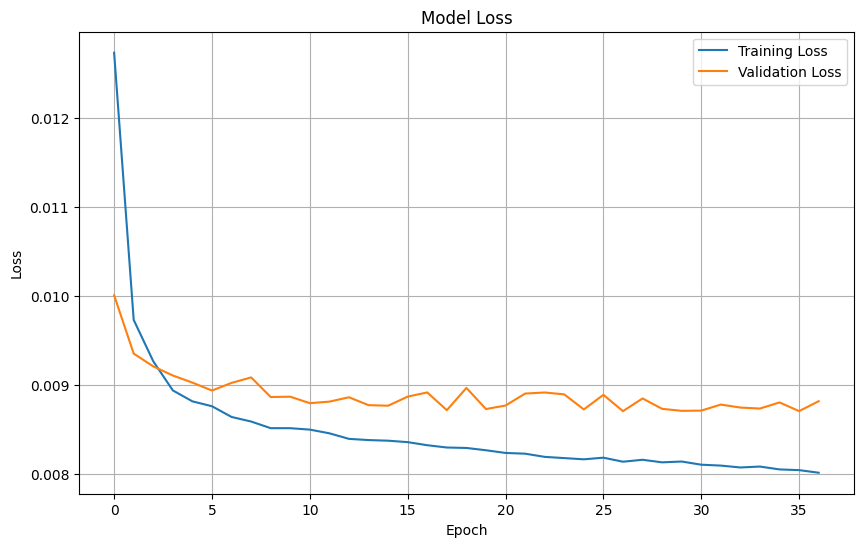

240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0083
Test Loss: 0.00789472833275795
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Mean Squared Error: 0.0079
Root Mean Squared Error: 0.0889
R² Score: 0.6370
Mean Squared Error: 53.2218
Root Mean Squared Error: 7.2953
R² Score: 0.6370


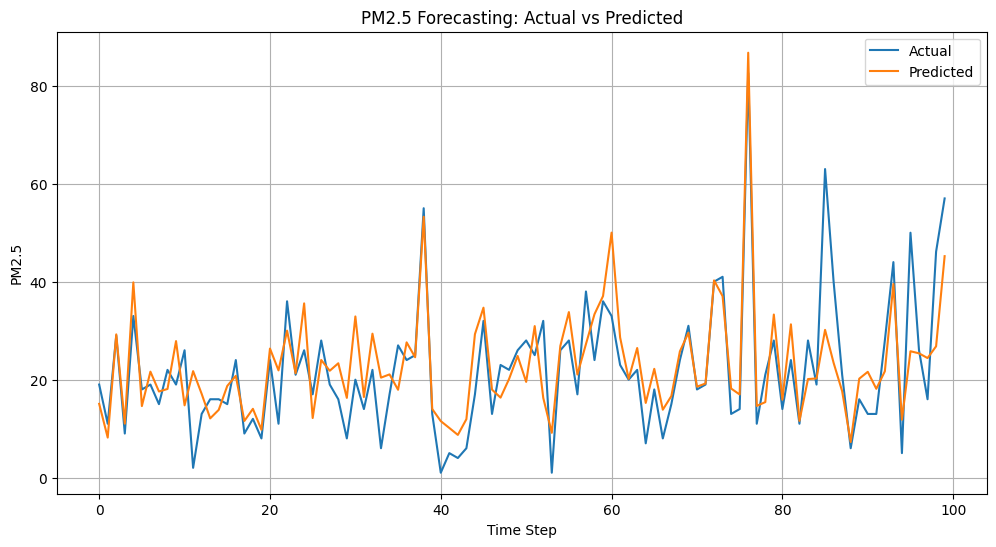

In [56]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate on test set
test_loss = lstm_model.evaluate(X_test_lstm, y_test_lstm)
print(f"Test Loss: {test_loss}")

# Make predictions
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Calculate the MSE, RMSE, and R2
mse = mean_squared_error(y_test_lstm, y_pred_lstm)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_lstm, y_pred_lstm)
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

# Create a separate scaler just for PM2.5 to inverse transform predictions
pm25_scaler = MinMaxScaler()
pm25_scaler.min_, pm25_scaler.scale_ = scaler.min_[pm25_idx], scaler.scale_[pm25_idx]

# Inverse transform to get actual PM2.5 values
y_test_actual = pm25_scaler.inverse_transform(y_test_lstm)
y_pred_actual = pm25_scaler.inverse_transform(y_pred_lstm)

mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual[:100], label='Actual')
plt.plot(y_pred_actual[:100], label='Predicted')
plt.title('PM2.5 Forecasting: Actual vs Predicted')
plt.ylabel('PM2.5')
plt.xlabel('Time Step')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


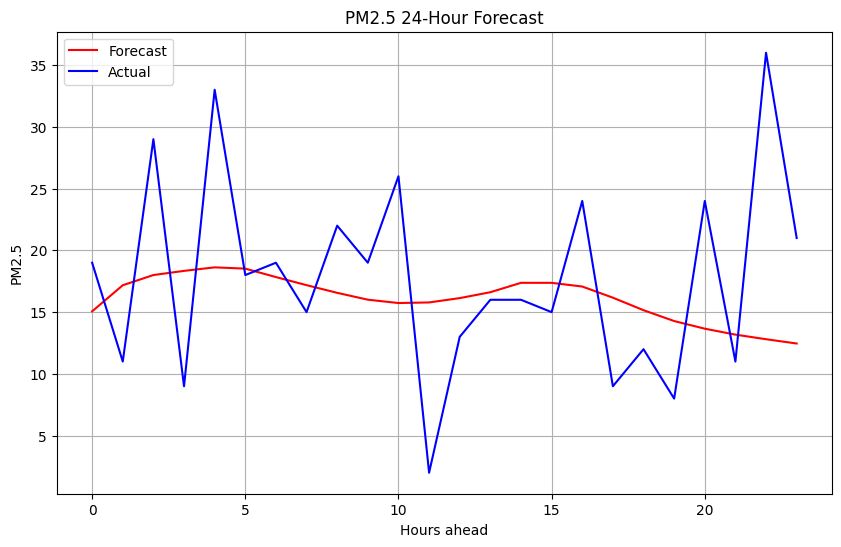

In [57]:
def forecast_multivariate_next_24h(model, last_sequence, scaler, pm25_idx):
    """
    Forecast PM2.5 values for the next 24 hours based on multivariate input
    
    Parameters:
    -----------
    model : Keras model
        Trained LSTM model
    last_sequence : numpy.ndarray
        Last sequence window with shape (1, seq_length, n_features)
    scaler : sklearn.preprocessing.MinMaxScaler
        Scaler used for all features
    pm25_idx : int
        Index of PM2.5 in the feature set
        
    Returns:
    --------
    numpy.ndarray
        Predicted PM2.5 values for next 24 hours
    """
    predictions = []
    current_sequence = last_sequence.copy()
    
    # Create a separate scaler just for PM2.5 to inverse transform predictions
    pm25_scaler = MinMaxScaler()
    pm25_scaler.min_, pm25_scaler.scale_ = scaler.min_[pm25_idx], scaler.scale_[pm25_idx]
    
    # Forecast next 24 hours one by one
    for _ in range(24):
        # Make prediction for next step
        next_pred = model.predict(current_sequence)
        predictions.append(next_pred[0, 0])
        
        # Create new sequence
        # Copy most recent 23 time steps
        new_sequence = current_sequence[0, 1:, :].copy()
        
        # Create the next time step with predicted PM2.5
        # Note: We're setting only PM2.5 value and keeping other features the same
        # In a real scenario, you might want to use forecasts of other features as well
        next_step = current_sequence[0, -1, :].copy()
        next_step[pm25_idx] = next_pred[0, 0]
        
        # Update sequence
        current_sequence = np.concatenate([new_sequence, next_step.reshape(1, -1)]).reshape(1, seq_length, -1)
    
    # Convert predictions back to original scale
    predictions = np.array(predictions).reshape(-1, 1)
    return pm25_scaler.inverse_transform(predictions)

# Get last sequence of data for prediction
last_sequence = X_test_lstm[0:1]  # Take the first test sequence
next_24h_pred = forecast_multivariate_next_24h(lstm_model, last_sequence, scaler, pm25_idx)

# Get actual values for comparison (if available)
actual_next_24 = None
if len(y_test_lstm) >= 24:
    actual_next_24 = y_test_actual[:24]

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(range(24), next_24h_pred, 'r-', label='Forecast')
if actual_next_24 is not None:
    plt.plot(range(24), actual_next_24, 'b-', label='Actual')
plt.title('PM2.5 24-Hour Forecast')
plt.xlabel('Hours ahead')
plt.ylabel('PM2.5')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
def lstm_model_builder(hp):
    model = tf.keras.models.Sequential()
    
    # Tune LSTM units
    lstm_units_1 = hp.Int('lstm_units_1', min_value=32, max_value=128, step=32)
    
    model.add(tf.keras.layers.LSTM(
        units=lstm_units_1,
        return_sequences=True,
        input_shape=(seq_length, n_features),
        recurrent_dropout=hp.Float('recurrent_dropout', min_value=0.0, max_value=0.3, step=0.1)
    ))
    
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    
    # Second LSTM layer
    model.add(tf.keras.layers.LSTM(
        units=hp.Int('lstm_units_2', min_value=16, max_value=64, step=16),
        return_sequences=True
    ))
    
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
    
    # Conditional third LSTM layer
    if hp.Boolean('use_third_lstm'):
        model.add(tf.keras.layers.LSTM(units=hp.Int('lstm_units_3', min_value=8, max_value=32, step=8)))
        model.add(tf.keras.layers.BatchNormalization())
    
    # Dense layers
    model.add(tf.keras.layers.Dense(
        units=hp.Int('dense_units', min_value=8, max_value=32, step=8),
        activation='relu'
    ))
    
    model.add(tf.keras.layers.Dense(1))
    
    # Compile with optimized learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='mean_squared_error'
    )
    
    return model

# Configure the tuner
tuner = kt.Hyperband(
    lstm_model_builder,
    objective='val_loss',
    max_epochs=100,
    factor=3,
    directory='lstm_tuning',
    project_name='pm25_lstm'
)

d:\UNAL\Tercer Semestre\Propuesta de TDG\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [59]:
# Search for the best hyperparameters
tuner.search(
    X_train_lstm, y_train_lstm,
    epochs=100,
    validation_data=(X_val_lstm, y_val_lstm),
    callbacks=[early_stopping]
)

Trial 76 Complete [00h 01m 19s]
val_loss: 0.01752505451440811

Best val_loss So Far: 0.009751049801707268
Total elapsed time: 01h 51m 35s

Search: Running Trial #77

Value             |Best Value So Far |Hyperparameter
32                |64                |lstm_units_1
0                 |0.2               |recurrent_dropout
0.4               |0                 |dropout_1
48                |16                |lstm_units_2
0.1               |0.4               |dropout_2
True              |True              |use_third_lstm
16                |16                |dense_units
0.0001            |0.01              |learning_rate
32                |16                |lstm_units_3
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
4                 |4                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
1437/1437 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - loss: 0.2839 - val_loss: 0.0330
Epoch 2/2
  64/1437 

KeyboardInterrupt: 

In [ ]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")

# Build the model with the optimal hyperparameters
best_model = tuner.hypermodel.build(best_hps)

Best hyperparameters: {'lstm_units_1': 96, 'recurrent_dropout': 0.1, 'dropout_1': 0.30000000000000004, 'lstm_units_2': 48, 'return_sequences': True, 'dropout_2': 0.0, 'use_third_lstm': True, 'dense_units': 24, 'learning_rate': 0.01, 'lstm_units_3': 16, 'tuner/epochs': 4, 'tuner/initial_epoch': 2, 'tuner/bracket': 4, 'tuner/round': 1, 'tuner/trial_id': '0028'}


240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0993
Test Loss: 0.0982636958360672
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Mean Squared Error: 0.0983
Root Mean Squared Error: 0.3135
R² Score: -3.2982
Mean Squared Error: 662.4385
Root Mean Squared Error: 25.7379
R² Score: -3.2982


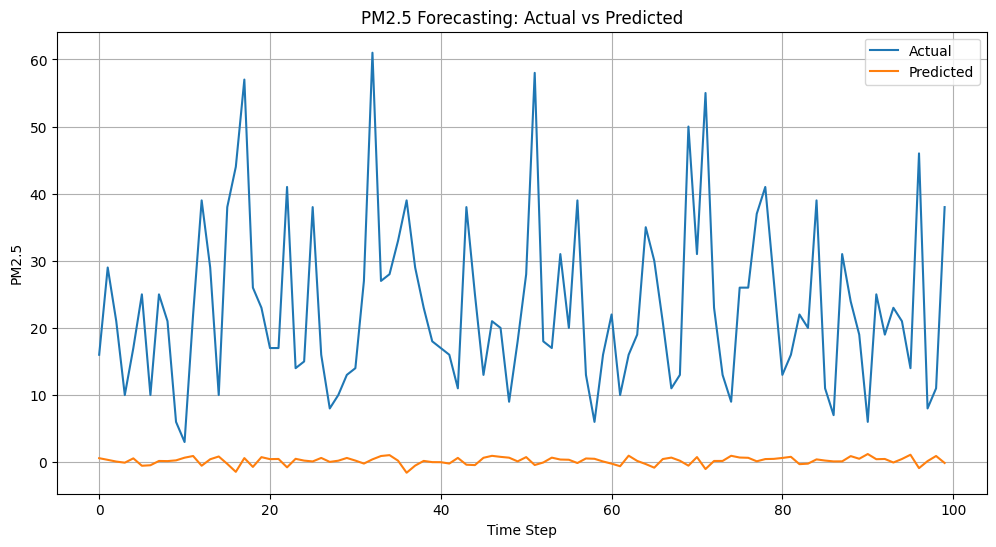

In [ ]:
# Evaluate on test set
test_loss = best_model.evaluate(X_test_lstm, y_test_lstm)
print(f"Test Loss: {test_loss}")

# Make predictions
y_pred_lstm = best_model.predict(X_test_lstm)

# Calculate the MSE, RMSE, and R2
mse = mean_squared_error(y_test_lstm, y_pred_lstm)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_lstm, y_pred_lstm)
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

# Create a separate scaler just for PM2.5 to inverse transform predictions
pm25_scaler = MinMaxScaler()
pm25_scaler.min_, pm25_scaler.scale_ = scaler.min_[pm25_idx], scaler.scale_[pm25_idx]

# Inverse transform to get actual PM2.5 values
y_test_actual = pm25_scaler.inverse_transform(y_test_lstm)
y_pred_actual = pm25_scaler.inverse_transform(y_pred_lstm)

mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual[:100], label='Actual')
plt.plot(y_pred_actual[:100], label='Predicted')
plt.title('PM2.5 Forecasting: Actual vs Predicted')
plt.ylabel('PM2.5')
plt.xlabel('Time Step')
plt.legend()
plt.grid(True)
plt.show()